In [22]:
%matplotlib inline
import json 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
rows =[] 

with open("../data/55_remote_net.json") as the_file:
    rows =  json.load(the_file) # [x.strip() for x in the_file.readlines()]

In [30]:
the_g = nx.Graph() #nx.MultiDiGraph()

In [31]:
nodes = []
edges = {}
edge_ones = []
for x in rows:
    edges[x['sequence_number']] = x
    from_node = "%s-%s" % (x["from_id"],x["from_name"])
    to_node = "%s-%s" % (x["to_id"],x["to_name"])
    nodes.append(from_node)
    nodes.append(to_node)
    edge_ones.append((from_node,to_node,x['sequence_number']))

In [32]:
the_g.add_nodes_from(nodes)
for pick in edge_ones:
    the_g.add_edge( pick[0],pick[1], number=pick[2] )
#     the_g.add_edges_from(edge_ones)



/home/omid/anaconda3/envs/iot_new/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


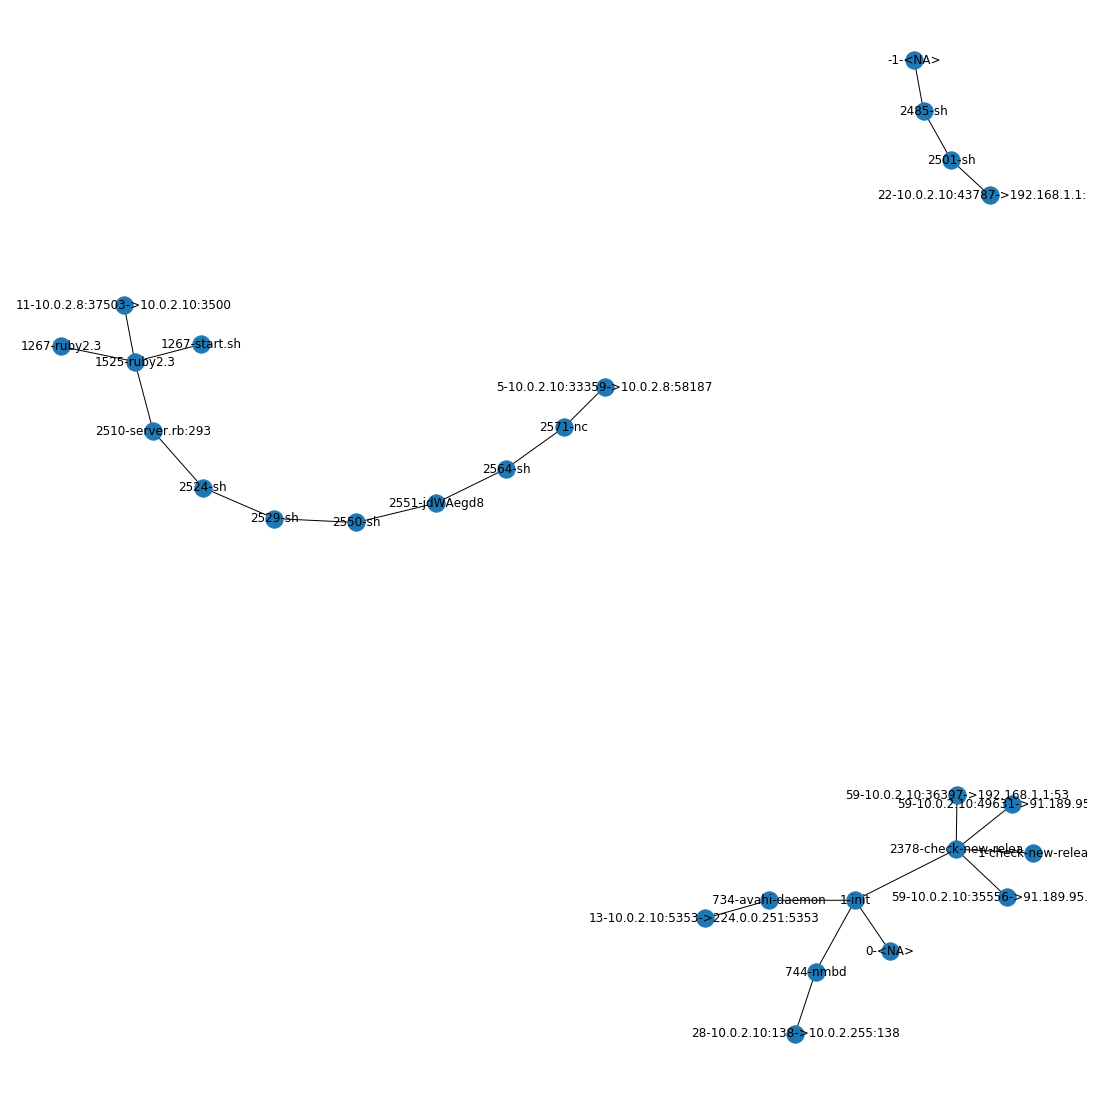

In [51]:
plt.figure(figsize=(15,15))
nx.draw(the_g,with_labels = True)


In [36]:
cmpts = nx.connected_components(the_g)

In [41]:
for x in cmpts:
    print(x)
    

In [52]:
len(the_g.nodes)

27

In [43]:
S = [the_g.subgraph(c).copy() for c in nx.connected_components(the_g)]


In [53]:
for x in S:
    print(len(x.nodes))

11
12
4


In [58]:
data  = []
for pick in S: 
    pick_edges = []
    for x in pick.nodes:
        for edge in edge_ones:
            if edge[0] == x or edge[1] == x :
                pick_edges.append(edge[2])

    data.append(list(set(pick_edges)))
        

In [65]:
cntr= 0 
for pick in data:
    cntr+=1
    with open("../output/%d.json" % cntr , "w") as the_file:
        json.dump([edges[x] for x in pick], the_file)

In [70]:
the_g = BG = nx.MultiDiGraph()

In [71]:
nodes = []
edges = {}
edge_ones = []
for x in rows:
    edges[x['sequence_number']] = x
    from_node = "%s-%s" % (x["from_id"],x["from_name"])
    to_node = "%s-%s" % (x["to_id"],x["to_name"])
    nodes.append(from_node)
    nodes.append(to_node)
    edge_ones.append((from_node,to_node,x['sequence_number']))

In [72]:
the_g.add_nodes_from(nodes)
for pick in edge_ones:
    the_g.add_edge( pick[0],pick[1], number=pick[2] )
#     the_g.add_edges_from(edge_ones)


/home/omid/anaconda3/envs/iot_new/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/omid/anaconda3/envs/iot_new/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


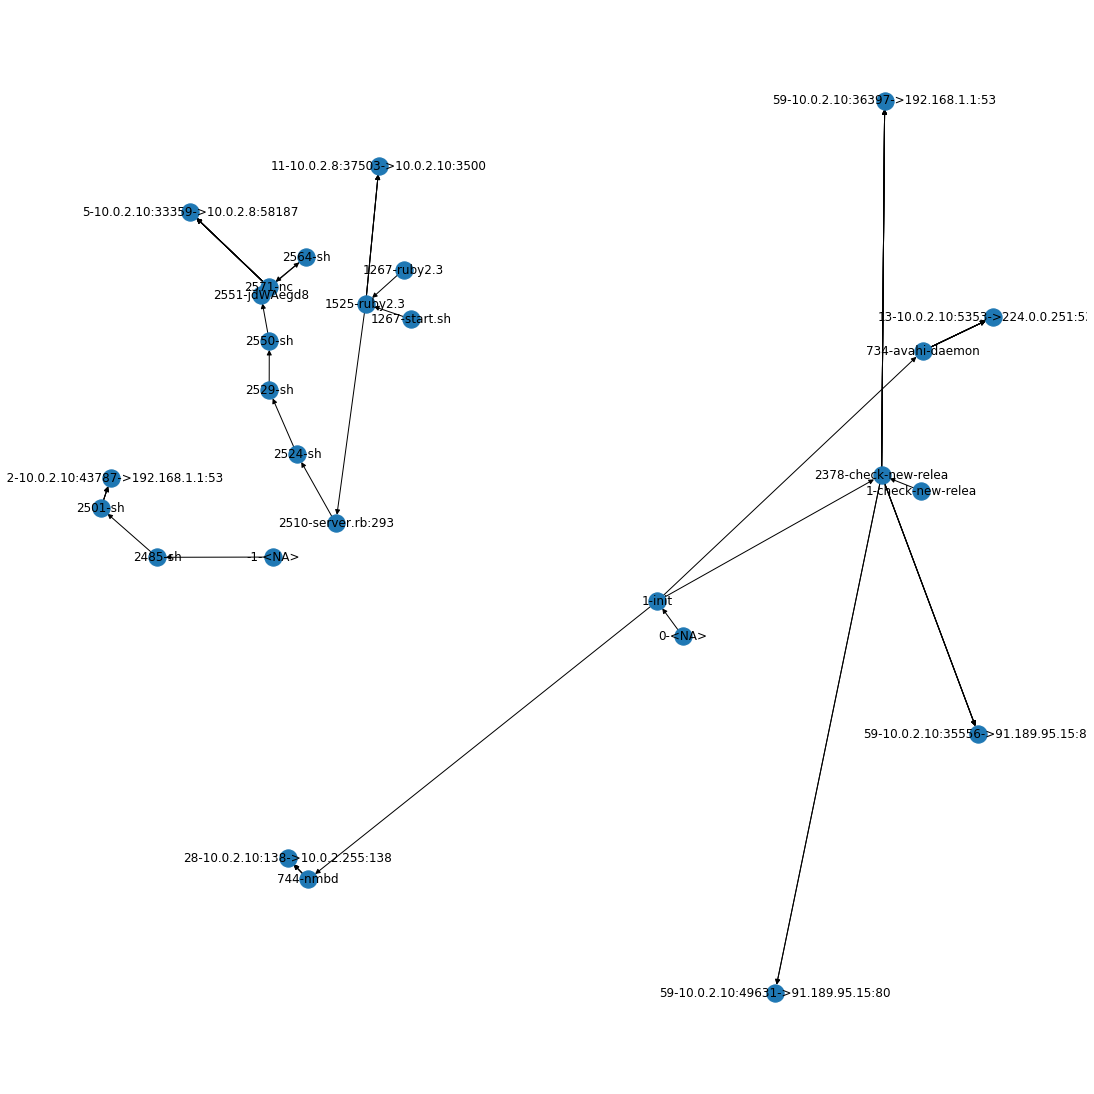

In [73]:
plt.figure(figsize=(15,15))
nx.draw(the_g,with_labels = True)

In [74]:
endnodes = [] 
for pick in the_g.nodes:
    if the_g.in_degree(pick) > 0 and the_g.out_degree(pick) ==0:
        endnodes.append(pick)
        

In [76]:
pathes = {x:[] for x in endnodes}

for node in the_g.nodes:
    for dest in endnodes:
        if nx.has_path(the_g, node, dest):
            pathes[dest].append(node)

In [77]:
for x in pathes:
    print(pathes[x])

['1-init', '2378-check-new-relea', '1-check-new-relea', '59-10.0.2.10:36397->192.168.1.1:53', '0-<NA>']
['1-init', '2378-check-new-relea', '1-check-new-relea', '59-10.0.2.10:49631->91.189.95.15:80', '0-<NA>']
['1-init', '2378-check-new-relea', '1-check-new-relea', '59-10.0.2.10:35556->91.189.95.15:80', '0-<NA>']
['1-init', '0-<NA>', '744-nmbd', '28-10.0.2.10:138->10.0.2.255:138']
['-1-<NA>', '2485-sh', '2501-sh', '22-10.0.2.10:43787->192.168.1.1:53']
['1-init', '0-<NA>', '734-avahi-daemon', '13-10.0.2.10:5353->224.0.0.251:5353']
['1267-start.sh', '1525-ruby2.3', '11-10.0.2.8:37503->10.0.2.10:3500', '1267-ruby2.3']
['1267-start.sh', '1525-ruby2.3', '1267-ruby2.3', '2510-server.rb:293', '2524-sh', '2529-sh', '2550-sh', '2551-jdWAegd8', '2564-sh', '2571-nc', '5-10.0.2.10:33359->10.0.2.8:58187']


In [78]:
S = [the_g.subgraph(x).copy() for x in pathes ]

In [80]:
data  = []
for pick in S: 
    pick_edges = []
    for x in pick.nodes:
        for edge in edge_ones:
            if edge[0] == x or edge[1] == x :
                pick_edges.append(edge[2])

    data.append(list(set(pick_edges)))
        

In [81]:
cntr= 0 
for pick in data:
    
    cntr+=1
    
    
    
    with open("../output/path_%d.json" % cntr , "w") as the_file:
        json.dump([edges[x] for x in pick], the_file)

In [82]:
pick = sorted(data[0], key=lambda i: i['sequence_number'])

TypeError: 'int' object is not subscriptable

In [84]:
sorted(data[0])

[8166, 8167, 8168, 8206, 8207, 8209]